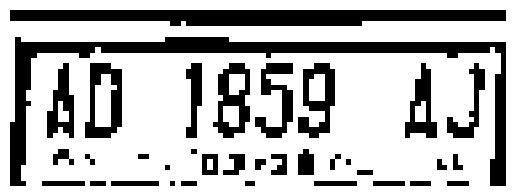

plat putih


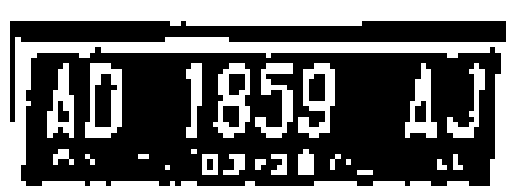

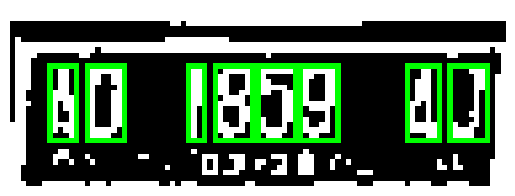

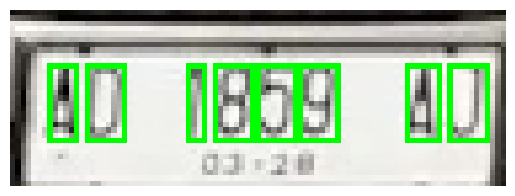

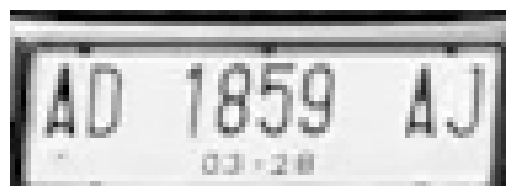

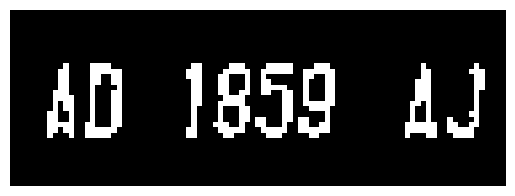

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_and_crop(image_path, output_path):
    image = cv2.imread(image_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_img = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    total_black_pixels = np.sum(binary_img == 0)
    total_white_pixels = np.sum(binary_img == 255)

    plt.imshow(binary_img,  cmap='gray')
    plt.axis('off')
    plt.show()

    binary_img = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    total_black_pixels = np.sum(binary_img == 0)
    total_white_pixels = np.sum(binary_img == 255)

    if total_black_pixels > total_white_pixels:
        print('plat hitam')
        binary_img = binary_img
    else:
        print('plat putih')
        binary_img = ~binary_img

    eroded = binary_img
    eroded_copy = cv2.cvtColor(eroded.copy(), cv2.COLOR_GRAY2RGB)
    image_with_boxes = image.copy()

    hx,wx,cx = image_with_boxes.shape

    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cropped_image = np.zeros_like(eroded)
    cropped_images = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if h > (1/3 * hx) and h < (1/2 * hx) and w < (1/2 * h + 1/4*h):
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.rectangle(eroded_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)

            cropped_image[y:y+h, x:x+w] = eroded[y:y+h, x:x+w]
            cropped_images.append(cropped_image[y:y+h, x:x+w])

            crop_output_path = f"{output_path}/crop_{i}.jpg"
            cv2.imwrite(crop_output_path, cropped_image)
        
    plt.imshow(eroded,  cmap='gray')
    plt.axis('off')
    plt.show()

    plt.imshow(eroded_copy)
    plt.axis('off')
    plt.show()


    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')
    plt.show()


    plt.imshow(cropped_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Contoh penggunaan fungsi
image_path = r'C:\Users\Ilham Mafani Nadif\Videos\Deteksi Plat Nomor\output\plat_nomor\Terdeteksi\Segment\detected___20230704000420_1.jpg'
output_path = r'C:\Users\Ilham Mafani Nadif\Videos\Deteksi Plat Nomor\output'
segment_and_crop(image_path, output_path)
